# GRIP:The Sparks Foundation
# Data Science and Business Analytics Intern

# Author- Pritish Kumar Jatwar
# Task 1 : Prediction using Supervised ML

### Aim : Predict the percentage of student based on the no. of study hours
### This problem can be solved using Simple Linear Regression which involves 2 variables


In [1]:
# Importing the required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


### Reading the data from given link

In [2]:
link= "http://bit.ly/w-data"
df = pd.read_csv(link)

### Exploratory data analysis

In [3]:
df.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [4]:
df.shape

(25, 2)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [6]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [7]:
df.tail(10)

,Hours,Scores
15,8.9,95
16,2.5,30
17,1.9,24
18,6.1,67
19,7.4,69
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


### Outlier detection using boxplot

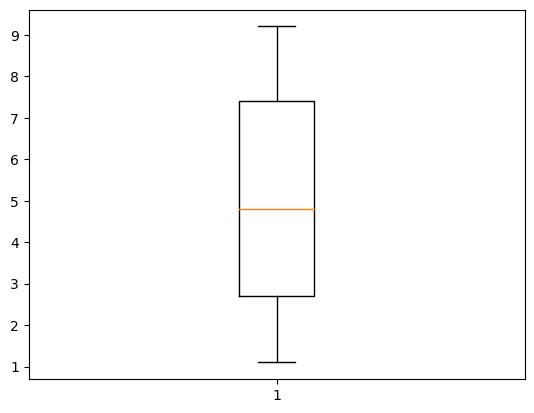

In [8]:
# Creating boxplot
plt.boxplot(df.Hours)
plt.show()

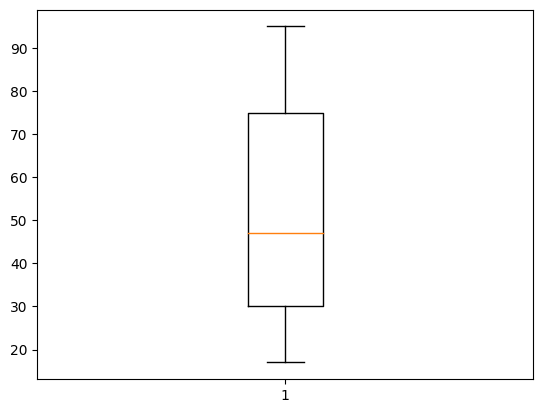

In [9]:
plt.boxplot(df.Scores)
plt.show()

### From above Boxplots it is clear that our data contains no outliers

### Now we will visualize our data

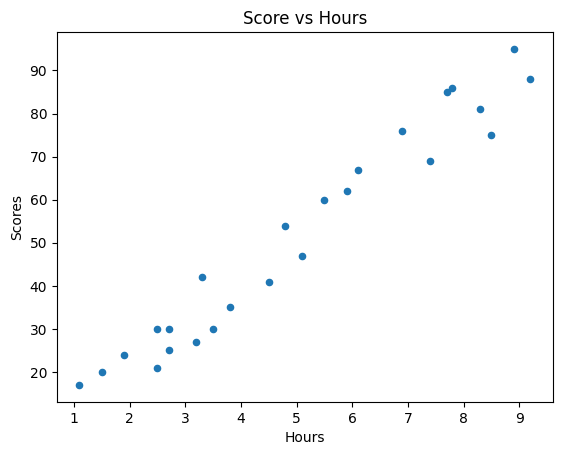

In [10]:
# We have 2 variables - Hours and Scores
# Now we will draw a scatter plot to find out if there is any relation among the 2 variables

df.plot(kind='scatter',x='Hours',y='Scores');
plt.title('Score vs Hours')
plt.show()

#### From the above Scatter Plot we can see there is a linear relationship between the 2 variables.So now we will plot
#### a Regression line to confirm the correlation

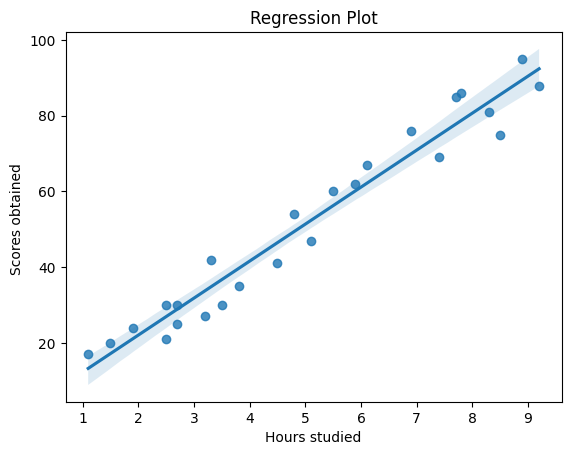

In [11]:
sns.regplot(x=df['Hours'],y=df['Scores'])
plt.title('Regression Plot')
plt.ylabel('Scores obtained ')
plt.xlabel('Hours studied')
plt.show()


In [12]:
# Finding Pearson correlation coefficient
df.corr(method='pearson')

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


#### Now it is confirmed that the variables have positive correlation

### Training the Model

### 1) Splitting the Data

In [13]:
# Defining X and Y from the data
X= df.iloc[:,:-1].values
Y= df.iloc[:,1].values

In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)


### 2) Fitting the data into the model

In [15]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(X_train,Y_train)

LinearRegression()

### Predicting the percentage of Marks

In [16]:
Y_pred=reg.predict(X_test)
actual_pred=pd.DataFrame({'Target':Y_test,'Predicted':Y_pred})
actual_pred

,Target,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


#### What would be the predicted score if a student studies for 9.25 hours/day?

In [17]:
a=9.25
b=reg.predict([[a]])
print("If a student studies for {} hours per day he/she will score {} % in exam.".format(a,b))

If a student studies for 9.25 hours per day he/she will score [93.69173249] % in exam.


### Model Evaluation

In [18]:
from sklearn import metrics
from sklearn.metrics import r2_score
print('Mean absolute Error:',metrics.mean_absolute_error(Y_test,Y_pred))
print('R2 score:',r2_score(Y_test,Y_pred))

Mean absolute Error: 4.183859899002975
R2 score: 0.9454906892105355


### Smaller value of mean absolute error and R2 square nearly 1 indicates that chances of error or wrong prediction through the model is very less